# Example 3

Считая, что зависимость между переменными x и y имеет вид $y=ax^{2}+bx+c$, найти оценки параметров a, b и c методом наименьших квадратов по выборке: 
```
x: 7 | 31| 61| 99| 129| 178| 209 
y: 13| 10| 9 | 10| 12 | 20 | 26
```

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({"x":[7, 31, 61, 99, 129, 178, 209],
                   "y":[13, 10, 9, 10, 12, 20, 26]})
df

,x,y
0,7,13
1,31,10
2,61,9
3,99,10
4,129,12
5,178,20
6,209,26


Теоретическое уравнение регрессии Y на Х будем искать в виде $y=ax^{2}+bx+c$

Неизвестные параметры a, b, c будем находить из системы линейных уравнений

$\begin{cases} a \sum x^{4}_{i} + b \sum x^{3}_{i} + c \sum x^{2}_{i} = \sum x^{2}_{i} y_{i} \\ a \sum x^{3}_{i} + b \sum x^{2}_{i} + c \sum x_{i} = \sum x_{i} y_{i} \\ a \sum x^{2}_{i} + b \sum x_{i} + cn = \sum y_{i} \end{cases}$

Для определения коэффициентов этой системы составим расчетную таблицу

In [4]:
df["x^4"] = df.x ** 4
df["x^3"] = df.x ** 3
df["x^2"] = df.x ** 2
df["x^2y"] = df["x^2"] * df.y
df["xy"] = df.x * df.y
n = df.x.size
n

7

In [5]:
df

,x,y,x^4,x^3,x^2,x^2y,xy
0,7,13,2401,343,49,637,91
1,31,10,923521,29791,961,9610,310
2,61,9,13845841,226981,3721,33489,549
3,99,10,96059601,970299,9801,98010,990
4,129,12,276922881,2146689,16641,199692,1548
5,178,20,1003875856,5639752,31684,633680,3560
6,209,26,1908029761,9129329,43681,1135706,5434


In [9]:
sum_x_4 = df["x^4"].sum()
print('sum_x_4 = ', sum_x_4)
sum_x_3 = df["x^3"].sum()
print('sum_x_3 = ', sum_x_3)
sum_x_2 = df["x^2"].sum()
print('sum_x_2 = ', sum_x_2)
sum_x_2_y = df["x^2y"].sum()
print('sum_x_2_y = ', sum_x_2_y)
sum_xy = df["xy"].sum()
print('sum_xy = ', sum_xy)
sum_x = df.x.sum()
print('sum_x = ', sum_x)
sum_y = df.y.sum()
print('sum_y = ', sum_y)

sum_x_4 =  3299659862
sum_x_3 =  18143184
sum_x_2 =  106538
sum_x_2_y =  2110824
sum_xy =  12482
sum_x =  714
sum_y =  100


В результате получим систему:

$\begin{cases} 3299659862 a + 18143184 b + 106538 c = 2110824 \\ 18143184 a + 106538 b + 714 c = 12482 \\ 106538 a + 714 b + 7 c = 100 \end{cases}$

```
sum_x_4 * a + sum_x_3 * b + sum_x_2 * c = sum_x_2_y 

sum_x_3 * a + sum_x_2 * b + sum_x * c = sum_xy 

sum_x_2 * a + sum_x * b + n * c = sum_y
```


In [12]:
a = (sum_x_2_y - (sum_x_2 * sum_y)/n - (sum_x_3 - (sum_x_2 * sum_x)/n)*sum_xy/ (sum_x_2 - (sum_x *sum_x)/n) + (sum_x_3 - (sum_x_2 * sum_x)/n)*(sum_x * sum_y)/n/ (sum_x_2 - (sum_x *sum_x)/n)) / (sum_x_4 - (sum_x_2 * sum_x_2)/n - (sum_x_3 - (sum_x_2 * sum_x)/n)*(sum_x_3 - (sum_x * sum_x_2)/n)/(sum_x_2 - (sum_x *sum_x)/n))

print('a = ', a)

b = (sum_xy - (sum_x * sum_y)/n - a*(sum_x_3 - (sum_x * sum_x_2)/n)) / (sum_x_2 - (sum_x *sum_x)/n)
print('b = ', b)

c = (sum_y - (sum_x * b + sum_x_2 * a)) / n
print('c = ', c)

a =  0.0008949034925079104
b =  -0.12546999233946152
c =  13.46347803508111


$\begin{cases} a \approx 0,0009 \\ b \approx -0,1255 \\ c \approx 13,4635 \end{cases}$

Получили теоретическое уравнение регрессии: 
$ y = 0,0009 x^{2} - 0,1255 x + 13,4635 $

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Создадим DataFrame y_trq результаты из полученного уравнения.
Построим график:

In [50]:
df_trq = pd.DataFrame()
df_trq["x"] = df.x
df_trq["y_trq"] = [0.0009 * x ** 2 - 0.1255 * x + 13.4635 for x in df.x]
df_trq["y"] = df.y
df_trq

,x,y_trq,y
0,7,12.6291,13
1,31,10.4379,10
2,61,9.1569,9
3,99,9.8599,10
4,129,12.2509,12
5,178,19.6401,20
6,209,26.5469,26


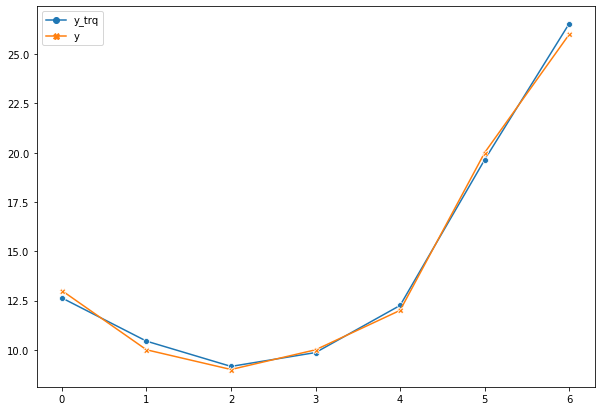

In [55]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_trq, markers=True, dashes=False)
